# NLP: Natural Language Processing

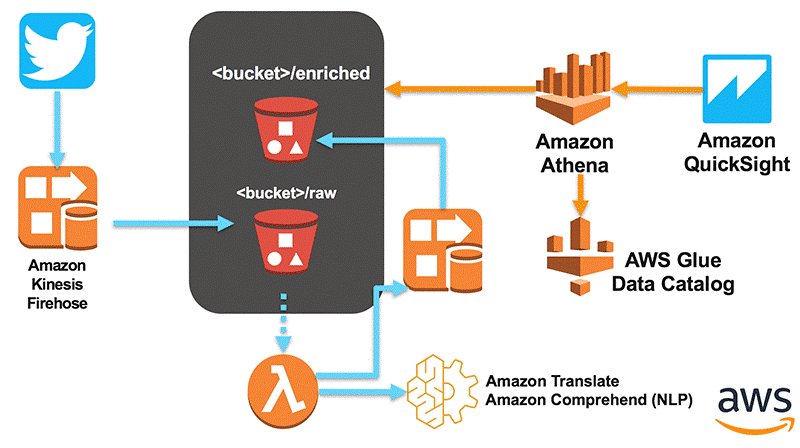

1) Técnicas más comúnes:

- Bag of words

- Tokenization

- Stop words removal

- Stemming

- Lemmatization

2) Extra: Latent Dirichet Allocator (LDA):


- STEP 1:   Assigning each word to a random topic, where the user defines the number of topics it wishes to uncover. You don’t define the topics themselves (you define just the number of topics) and the algorithm will map all documents to the topics in a way that words in each document are mostly captured by those imaginary topics.
    


- STEP 2: The algorithm goes through each word iteratively and reassigns the word to a topic taking into considerations the probability that the word belongs to a topic, and the probability that the document will be generated by a topic. These probabilities are calculated multiple times, until the convergence of the algorithm.




3) Manos a la obra!

In [1]:
import nltk
import urllib.request
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
from matplotlib import style
response =  urllib.request.urlopen('https://en.wikipedia.org/wiki/SpaceX')
plt.style.use('dark_background')
html = response.read()
print(html)

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>SpaceX - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"9d4edc72-3636-407b-a780-187a0bc61033","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"SpaceX","wgTitle":"SpaceX","wgCurRevisionId":1055598096,"wgRevisionId":1055598096,"wgArticleId":832774,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Source attribution","All articles with dead external links","Articles with dead external links from August 2021","Articles with permanently dead e

In [2]:
soup = BeautifulSoup(html,'html5lib')
text = soup.get_text(strip = True)
print(text)

SpaceX - Wikipediadocument.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"9d4edc72-3636-407b-a780-187a0bc61033","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"SpaceX","wgTitle":"SpaceX","wgCurRevisionId":1055598096,"wgRevisionId":1055598096,"wgArticleId":832774,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Source attribution","All articles with dead external links","Articles with dead external links from August 2021","Articles with permanently dead external links","CS1 maint: bot: original URL status unknown","CS1 errors: missing periodical","Articles with short descriptio

### Tokenization


In [3]:
tokens = [t for t in text.split()]
print(tokens)

['SpaceX', '-', 'Wikipediadocument.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"9d4edc72-3636-407b-a780-187a0bc61033","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"SpaceX","wgTitle":"SpaceX","wgCurRevisionId":1055598096,"wgRevisionId":1055598096,"wgArticleId":832774,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive', 'template', 'wayback', 'links","Source', 'attribution","All', 'articles', 'with', 'dead', 'external', 'links","Articles', 'with', 'dead', 'external', 'links', 'from', 'August', '2021","Articles', 'with', 'permanently', 'dead', 'external', 'links","CS1', 'maint:', 'bot:', 'original', 'U

### Stopwords removal

In [4]:
sr= stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))

SpaceX:147
-:1
Wikipediadocument.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"9d4edc72-3636-407b-a780-187a0bc61033","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"SpaceX","wgTitle":"SpaceX","wgCurRevisionId":1055598096,"wgRevisionId":1055598096,"wgArticleId":832774,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive:1
template:2
wayback:2
links","Source:1
attribution","All:1
articles:6
dead:10
external:6
links","Articles:1
links:3
August:32
2021","Articles:1
permanently:2
links","CS1:1
maint::3
bot::3
original:193
URL:3
status:3
unknown","CS1:1
errors::2
missing:2
periodical","Articles:1
short:3
descr

August2013.^"Encyclopedia:1
Astronautica:1
Kestrel".:1
June2021.CS1:1
unknown:1
(link)^"SpaceX:1
Thruster:1
Performs:1
Long-Duration:1
Firing:1
Restart"(Press:1
release).:3
March2017.^Colangelo,:1
Anthony."Farewell,:1
Red:1
Dragon".Main:1
Engine:1
Cut:1
Off.Archivedfrom:1
February2019.^"SpaceX:2
performs:1
engine".:1
April2017.^Grush,:1
Loren:1
(3:4
time".:1
April2019.^"Big:1
News!:1
Starhopper:1
Completes:2
First:1
Free:1
Flight!".:1
Retrieved11:4
August2019.^Berger,:1
2020)."So,:1
turns:1
pretty:1
good:1
rocketing".Ars:1
March2021.^"Crew:1
Dragon's:2
concludes:1
splashdown:1
NASASpaceFlight.com".:1
Retrieved8:3
March2019.^Clark,:1
Stephen:1
(7:1
2019)."After:2
redesigns,:1
finish:1
sight:1
spaceship".:1
June2020.'With:1
[the:1
parachutes]:1
angle:1
seats,:1
get:1
anymore',:1
said.:1
"So:1
seats.:1
That:3
kind:1
big:3
change:1
us".^"SpaceX:1
flight".:1
Retrieved7:1
December2020.^Potter,:1
Sean:1
2020)."NASA:1
Awards:2
Artemis:1
Contract:3
Services".:1
NASA.Archivedfrom:5
March2020.Thi

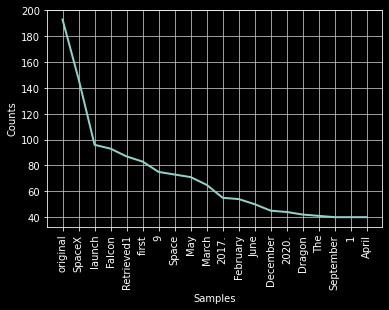

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [5]:
freq.plot(20, cumulative=False)

# Referencias:



- [your guide to natural language processing](https://towardsdatascience.com/your-guide-to-natural-language-processing-nlp-48ea2511f6e1)

- [Listen to Citizen and Student Sentiment with Machine Learning ](https://aws.amazon.com/es/blogs/publicsector/listen-to-citizen-and-student-sentiment-with-machine-learning/)

- [About Bag of words](https://machinelearningmastery.com/gentle-introduction-bag-words-model/)

- [A guide to bag of words](https://stackabuse.com/python-for-nlp-creating-bag-of-words-model-from-scratch/)

- [Natural Language Toolkit (NTLK)](https://www.nltk.org/book/)

- [A Gentle start to NLP](https://towardsdatascience.com/gentle-start-to-natural-language-processing-using-python-6e46c07addf3)

In [6]:
 nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True